In [2]:
import numpy
import scipy
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
import logging

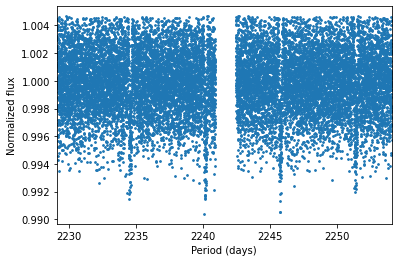

In [3]:
import numpy as np
import pandas as pd
import scipy.signal
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger('matplotlib')
logger.setLevel(logging.CRITICAL)

#df=pd.read_csv(r'./personal_epochs/thaddaeus/march_2022/misc/bls_demo_data.csv')
#relative paths don't work on Jupyter notebook. maybe try something else next time
df=pd.read_csv(r'C:\Users\Kiana\OneDrive\Documents\GitHub\sunnyhills\personal_epochs\thaddaeus\march_2022\misc\bls_demo_data.csv')
t = np.array(df['time']) #x-axis
y = np.array(df['flux']) #y-axis

#I took out the filtering stuff. It works now :D

#everytime you use "ax", it's specifying something that has to do with that specific plot. So I suppose the next plot you make will have to be
#called something else? Or will it just override it once it begins to run the new stuff?
plt.figure()
plt.plot() 
ax = plt.gca()
ax.scatter(t, y, s=3)
ax.set_xlim(t.min(), t.max())
ax.set_xlabel("Period (days)")
ax.set_ylabel("Normalized flux");

Gap because of gap in data?

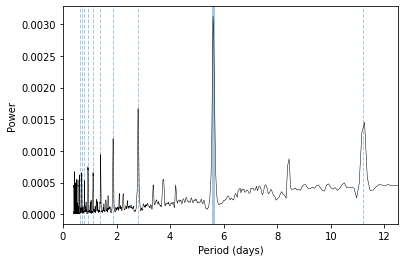

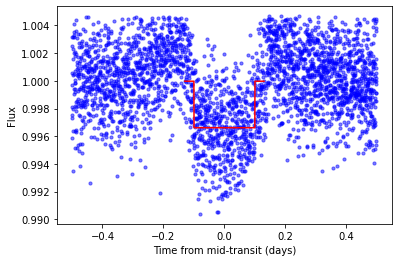

In [17]:
from astropy.stats import BoxLeastSquares

durations = numpy.linspace(0.05, 0.2, 20) #Duration: time the planet is in front of the star. Linspace is the amount of points to try between 0.05 and 0.2 days
model_bls = BoxLeastSquares(t, y) #the type of graph displayed
results_bls = model_bls.autopower(durations, frequency_factor=10) #Autopower: the fancy math that I don't need to understand.
#periodogram: something that graphs the periods
period = results_bls.period[numpy.argmax(results_bls.power)] #the periods that repeat the most

#This is the plot of the periods  
plt.figure()
ax = plt.gca() #why does this need to be here? Does it not carry over from the previous cell? Or does this clear the association somehow?
ax.axvline(period, alpha=0.4, lw=3) #vertical solid line on the period. There is only one
for n in range(2, 10): #n is the number of times transited
    ax.axvline(n*period, alpha=0.4, lw=1, linestyle="dashed") #These are the harmonics. Make vertical dashed lines on each
    ax.axvline(period / n, alpha=0.4, lw=1, linestyle="dashed") #These are the subharmonics. Make vertical dashed lines on each
plt.ylabel(r'Power') #stochastic differential equations. Are we taking the derivative of something? :O OH WAIT, this might be the slope of the 
#initial data. But where are we getting the equation of that previous line? The slope would be greater when the peak is larger, so this graph would
# ... never mind, I don't think that would work. Did i miss that?
plt.xlabel(r'Period (days)') 
plt.plot(results_bls.period, results_bls.power, color='black', lw=0.5) #plot the period versus power. So, this means plotting each period and
#how many times it had a peak? Or the intensity of that peak? I need another explanation...
plt.xlim(0, max(results_bls.period)); #end the graph when you run out of data

#argmax:the maximum power occurs in the ___ place in the list.
index = numpy.argmax(results_bls.power) 
period = results_bls.period[index] 
t0 = results_bls.transit_time[index] #first middle of the transit
duration = results_bls.duration[index] #best transit duration

plt.figure()
ax = plt.gca()
x = (t - t0 + 0.5*period) % period - 0.5*period #%period: divide by period and take remainder. this overlays all of the reocrded transits
m = numpy.abs(x) < 0.5
plt.scatter(
    x[m],
    y[m],
    color='blue',
    s=10,
    alpha=0.5,
    zorder=2)
x = numpy.linspace(-0.13, 0.13, 1000)
f = model_bls.model(x + t0, period, duration, t0)
ax.plot(x, f, color='red')
#ax.set_xlim(-0.13, 0.13)
#plt.ylim(0.9985, 1.00025)
ax.set_xlabel("Time from mid-transit (days)")
ax.set_ylabel("Flux");

In [21]:
print(t.max()-t.min())
number_of_transits=(t.max()-t.min())/period
print(number_of_transits)

24.987753389153113
4.460967212891567


why do the subharmonics align with the peaks? I don't understand

Notes
t=timestamps
y=observations (brightness)
dy=error bars
snr=signal to noise ratio
objective="snr": like log function, makes more reliable transit